In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from matplotlib import pyplot
import datetime
from scipy.optimize import minimize

In [33]:
# Read the CSV file into a pandas dataframe
df = pd.read_csv("/Users/albertotrashaj/Nile.csv")

# Print the dataframe to verify that the data was loaded correctly
print(df)


    Unnamed: 0     x
0            1  1120
1            2  1160
2            3   963
3            4  1210
4            5  1160
..         ...   ...
95          96   746
96          97   919
97          98   718
98          99   714
99         100   740

[100 rows x 2 columns]


Analyse the data using the local level model (2.3) with $a_1 = 0$, $P_1 = 107$, $\sigma_{\epsilon}^2 = 15,099$ and $\sigma_{\eta}^2 = 1,469.1$

In [3]:
#Initialize the constants
sigma_eta = 1469.1
sigma_epsilon = 15099

a_1 = 0
P_1 = 10**7


Let's define the local level model

In [52]:
n = 100
mu = np.zeros(n)
y= df['x']

sigma_epsilon = 1
sigma_eta = 1

eta = np.random.normal(0, sigma_eta, n)
epsilon = np.random.normal(0, sigma_epsilon, n)

for t in range(n-1):
    mu[t+1] = mu[t] + eta[t]
    y[t] = mu[t] + epsilon[t]
    
    # run Kalman filter
    mu_pred = np.zeros(n)
    P = np.zeros(n)
    v = np.zeros(n)
    K = np.zeros(n)
    F = np.zeros(n)
    llk = np.zeros(n)
    
    P[1] = 10**7
    llk[1]=0
    
    for t in range(n-1):
        v[t]= y[t] - mu_pred[t]
        F[t] = P[t] + sigma_epsilon**2
        K[t] = (1 * P[t])/F[t]
        P[t+1] = 1**2 * P[t] + sigma_eta**2 -K[t]**2*F[t] 
        mu_pred[t+1] = 1 * mu_pred[t] + K[t]*v[t]
        llk[t] =- n/2*(math.log(math.pi)) -0.5 *math.log(F[t] + (v[t]**2/F[t]))
    log_lik = sum(llk)



def log_likelihood(variance, data):
    n = len(data)
    log_likelihood = -0.5 * n * np.log(2 * np.pi)
    log_likelihood -= 0.5 * (n - 1) + (n - 1) * np.log(variance)
    log_likelihood -= 0.5 * np.sum(np.log(data[1:] ** 2 * variance))
    return -log_likelihood

a = [1,1]
log_likelihood(a, y)
    

/var/folders/4z/ffhfh8nj0zz1mqdx8xrwbjfr0000gn/T/ipykernel_34827/1419685072.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[t] = mu[t] + epsilon[t]


ValueError: operands could not be broadcast together with shapes (99,) (2,) 

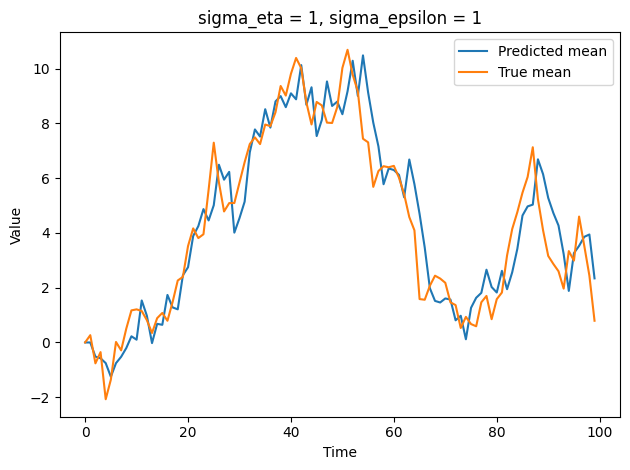

Text(0.5, 1.0, 'Time series plot of y')

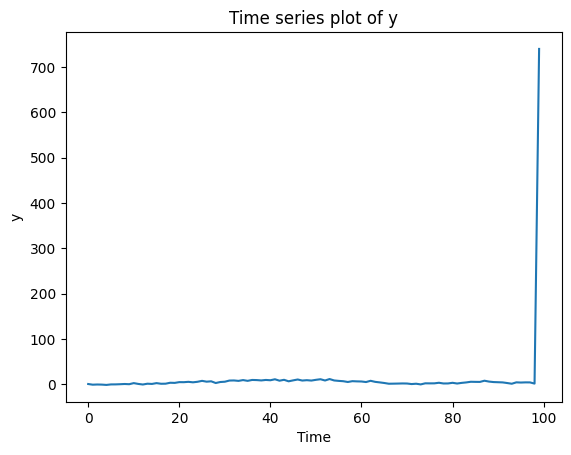

In [35]:
plt.plot(mu_pred, label='Predicted mean')
plt.plot(mu, label='True mean')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Value')
plt.title(f'sigma_eta = {sigma_eta}, sigma_epsilon = {sigma_epsilon}')
plt.tight_layout()
plt.show()

# Create a time array for the x-axis
t = np.arange(n)

# Create a figure and axis object
fig, ax = plt.subplots()

# Plot the time series y
ax.plot(t, y)

# Add axis labels and a title
ax.set_xlabel('Time')
ax.set_ylabel('y')
ax.set_title('Time series plot of y')

In [41]:
df['Unnamed: 0'] = pd.to_datetime(df['Unnamed: 0']) #convert the first column in the set of time 
# Define the window size for rolling mean calculation
df['mean'] = df['x'].rolling(window=7).mean() #apply 

# Calculate rolling standard deviation
df['std'] = df['x'].rolling(window=7).std()

# Calculate upper and lower bounds for confidence interval
alpha = 0.95  # Define the desired confidence level
z_score = np.abs(1 - alpha) / 2  # Calculate the corresponding z-score
df['lower_bound'] = df['mean'] - z_score * df['std']
df['upper_bound'] = df['mean'] + z_score * df['std']

df['mean']

0       0.436277
1      -1.033299
2      -0.619938
3      -0.863947
4      -1.559632
         ...    
95      3.691800
96      4.062544
97      3.997064
98      1.350858
99    740.000000
Name: mean, Length: 100, dtype: float64

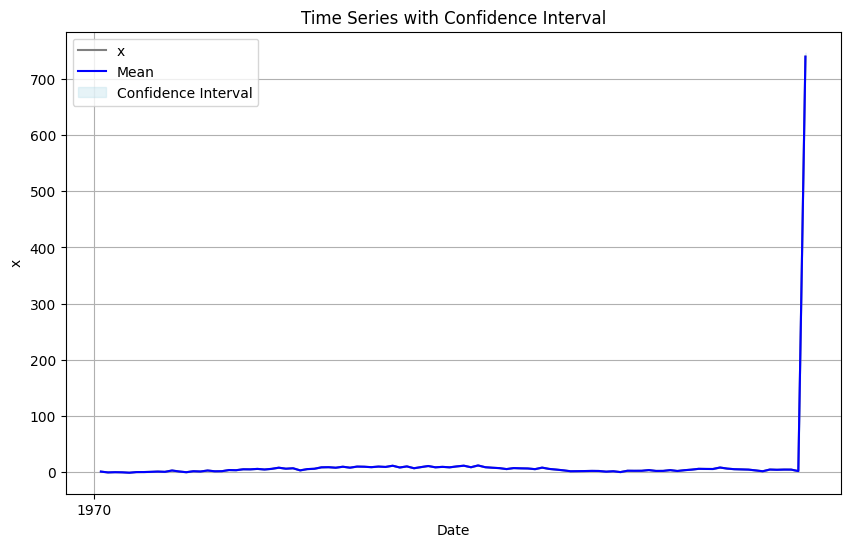

In [42]:
# Plotting the time series with confidence interval
plt.figure(figsize=(10, 6))
plt.plot(df['Unnamed: 0'], df['x'], color='gray', label='x')
plt.plot(df['Unnamed: 0'], df['mean'], color='blue', label='Mean')
plt.fill_between(df['Unnamed: 0'], df['lower_bound'], df['upper_bound'], color='lightblue', alpha=0.3, label='Confidence Interval')
plt.xlabel('Date')
plt.ylabel('x')
plt.title('Time Series with Confidence Interval')
plt.legend()
plt.grid(True)
plt.show()
